In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle
from functions import get_dyn_v2, get_prop_abs_v2, create_R_v1, get_x2_var, get_x2_var_short_time, get_var_hist,simulate_traj, create_R, get_prop_abs
from setup import setup_matplotlib

setup_matplotlib()

np.random.seed(42)

In [12]:
k = 1
s = 1
D = s**2/2
N_t = 100
ntau = 3
dx = 0.2
sb = 20*dx

f = 15
N_p = 16_000


x_s = np.arange(-sb,sb+1e-6,dx)
bins = np.arange(-sb-dx/2,sb+dx/2+1e-5,dx)
N_x = len(x_s)

def force(x,*args):
     return -k*x

i_zero = np.argmin(x_s**2)


ltaus = np.concatenate(([0.05], np.arange(0.2,1.8,0.2) ))
sim_vars = np.empty(len(ltaus))
num_vars = np.empty(len(ltaus))
num_vars_2 = np.empty(len(ltaus))
sim_hist_vars = np.empty(len(ltaus))

In [16]:
for i,ltau in enumerate(tqdm(ltaus)): 
    ldt = ltau/ntau
    # prop = get_prop_abs_v2(x_s, force,D,ldt,dx, side = 'lr')
    # R, _, end_states = create_R_v1(N_x, ntau, prop)
    prop = get_prop_abs_v2(x_s, force,D,ldt,dx)
    R, _, end_states = create_R_v1(N_x, ntau, prop)
    
    _, hists = get_dyn_v2(R, i_zero,N_t, N_x, ntau, end_states)
    
    
    pos = simulate_traj(N_p=N_p, N_loop=1, N_t=(N_t+ntau+2)*f, ntau=ntau*f, s=s, dt=ldt/f,border=0, force=force)
    all_pos = pos[0]
    sim_hists = [np.histogram(all_pos[:,j], bins = bins)[0] for j in tqdm(range(all_pos.shape[-1]), leave=False)]
 
    sim_var = np.var(pos, axis = 1)
    sim_hist_var = get_var_hist(sim_hists, x_s)
    
    num_var = get_var_hist(hists, x_s)

    
    sim_vars[i] = np.mean(sim_var[0,-(f*N_t)//2:])
    num_vars[i] = np.mean(num_var[-N_t//2:])
    sim_hist_vars[i] = np.mean(sim_hist_var[-f*N_t//2:])

    
# with open(f'nummeric_results/sim_vs_num_v4_emb{tau_frac}_x4.pkl', 'wb') as file:
#     pickle.dump({'ltaus':ltaus,
#                  'sim_vars':sim_vars,
#                  'sim_hist_vars':sim_hist_vars,
#                  'num_vars':num_vars
#                 }, file)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1529 [00:00<?, ?it/s]

  0%|          | 0/1575 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1529 [00:00<?, ?it/s]

  0%|          | 0/1575 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1529 [00:00<?, ?it/s]

  0%|          | 0/1575 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1529 [00:00<?, ?it/s]

  0%|          | 0/1575 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1529 [00:00<?, ?it/s]

  0%|          | 0/1575 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1529 [00:00<?, ?it/s]

  0%|          | 0/1575 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1529 [00:00<?, ?it/s]

  0%|          | 0/1575 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1529 [00:00<?, ?it/s]

  0%|          | 0/1575 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1529 [00:00<?, ?it/s]

  0%|          | 0/1575 [00:00<?, ?it/s]

In [17]:
short_time_approx_var = get_x2_var_short_time(ltaus, k, s)
exact_sol = get_x2_var(ltaus, k, s)

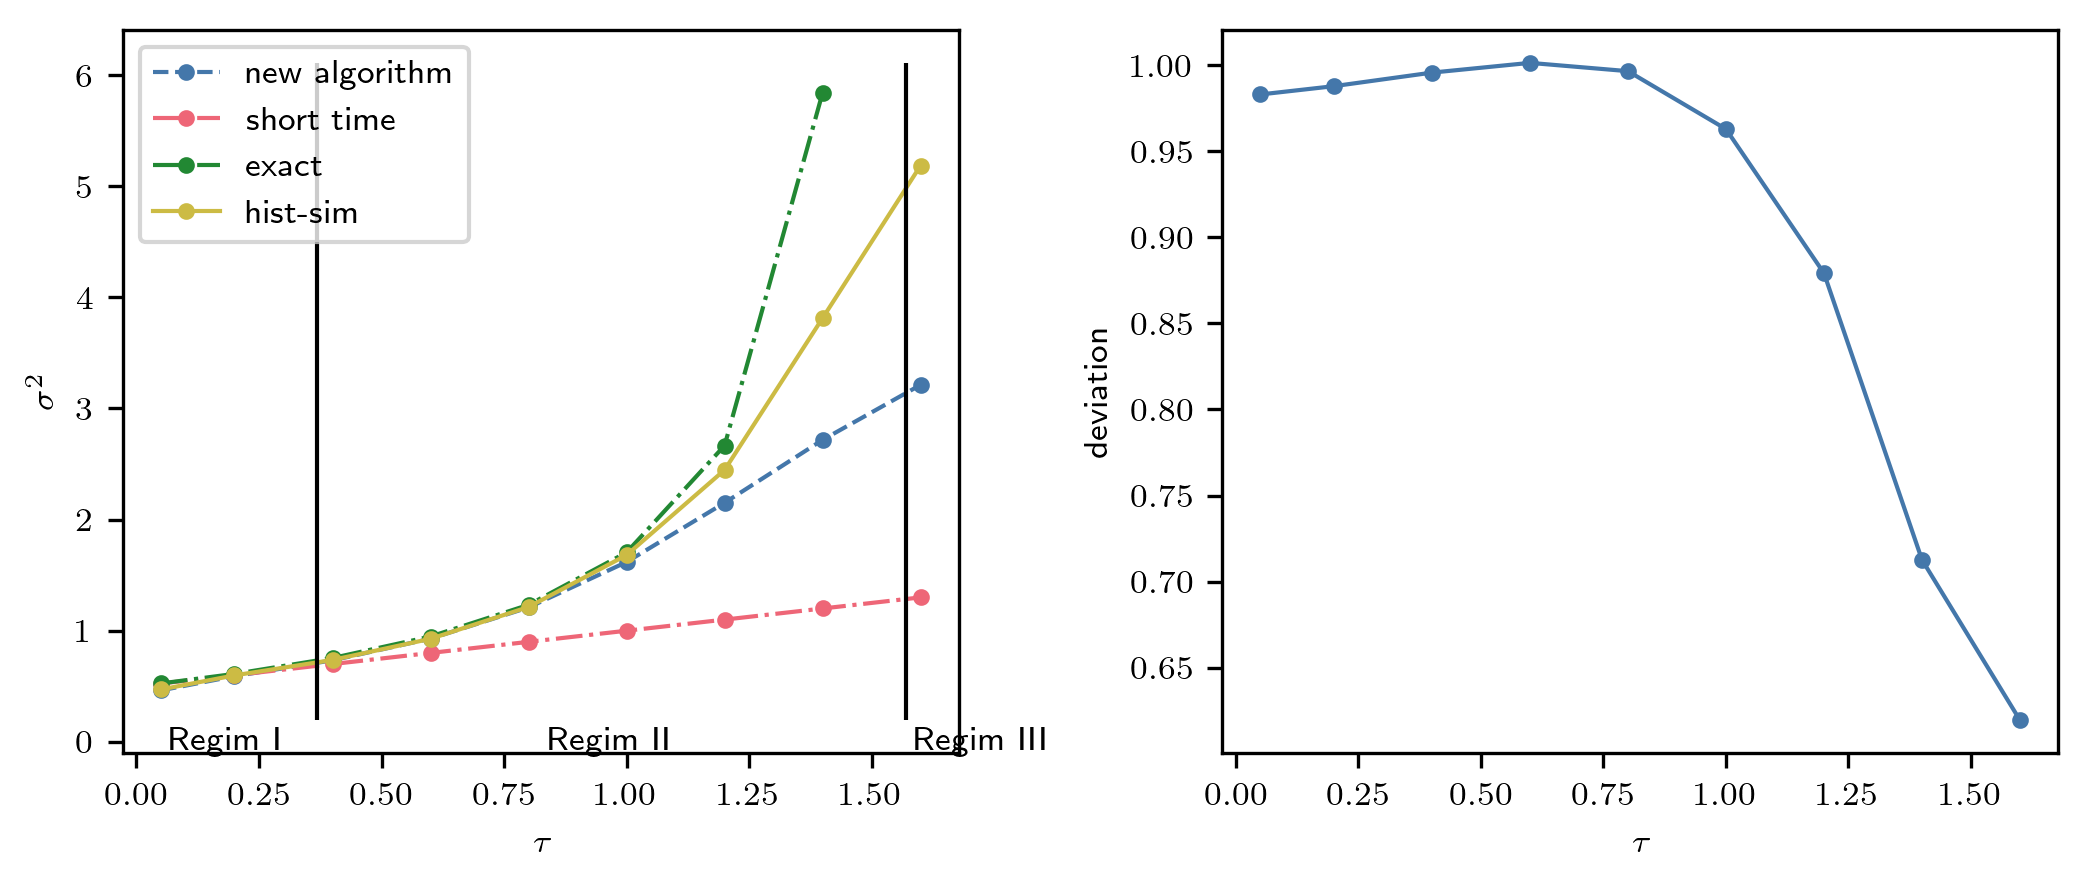

In [18]:
plt.figure(figsize=(7,3))
ax = plt.subplot(121)
#plt.plot(ltaus,sim_vars,'.-', label='sim')

plt.plot(ltaus,num_vars,'.--', label='new algorithm')



plt.plot(ltaus,short_time_approx_var ,'.-.',label='short time')
plt.plot(ltaus[:-1],exact_sol[:-1] ,'.-.',label='exact')

plt.plot(ltaus,sim_hist_vars,'.-', label='hist-sim')

plt.vlines([1/np.e /k, np.pi/2/k],*plt.ylim(), color='black')
y = 3e-7
plt.text(0.5*1/np.e /k,              y,'Regim I', ha='center', va='center')
plt.text(0.5*(1/np.e /k+  np.pi/2/k),y,'Regim II',ha='center', va='center')
plt.text(1.1*(np.pi/2/k),            y,'Regim III',ha='center', va='center')

#plt.yscale('log')
plt.legend()
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\sigma^2$')

#auflösungslimit
#plt.hlines((x_s[-1]/3)**2, *plt.xlim())

ax = plt.subplot(122)
plt.plot(ltaus, num_vars/sim_hist_vars, '.-')
plt.xlabel(r'$\tau$')
plt.ylabel(r'deviation')


plt.tight_layout()
#plt.savefig('graphics/x2variance.pdf')